# Dimensionality Reduction

* Many dimensions are often interdependent (correlated)


We can:

  * Reduce the dimensionality of problems;
  * Transform interdependent coordinates into significant and independent ones;




$\DeclareMathOperator*{\argmax}{arg\,max}
\DeclareMathOperator*{\argmin}{arg\,min} 
\newcommand{\bfv}{{\mathbf v}}
\newcommand{\bfx}{{\mathbf x}}$

<div class="alert-info">



### Unsupervised dimensionality reduction

1. Linear: Principal Component Analysis (PCA) 
2. Kernel Principal Component Analysis: Kernel PCA (KPCA)



</div>









## Principal Component Analysis- PCA (also called Karhunen-Loeve transformation)

* PCA transforms the original input space into a lower dimensional space, by constructing dimensions that are linear combinations of the given features

* The objective is to consider $\color{red}{\mbox{independent dimensions}}$ along which data have $\color{red}{\mbox{largest variance}}$ (i.e., greatest variability) 

## PCA

* PCA involves a linear algebra procedure that transforms a number of possibly correlated variables into a smaller number of uncorrelated variables called $\color{red}{\mbox{principal components}}$

* The first principal component accounts for as much of the variability in the data as possible;

* Each succeeding  component (orthogonal to the previous ones) accounts for as much of the remaining variability as possible. 

$X$ data frame $q \times N$

$q:$ number of features
    
$N:$ number of examples 
    
$\bfx={(x_1, x_2, \ldots, x_q)}^T \in X$ is a given example



* PCA finds $n$ linearly transformed  components 
$$
\bfv_1,\bfv_2,...,\bfv_n 
$$

so that they explain the maximum amount of variance;





* We can define PCA in an intuitive way using a recursive formulation:

* Suppose data are first centered at the origin (i.e., their mean is 0 );
We define the direction of the first principal component, say  $\bfv_1$, as follows

$${\mathbf \bfv_1}= \argmax_{\| \bfv \|=1} E[{(\bfv^T\bfx)}^2]$$

where $\bfv_1$ is of the same dimensionality $q$ as the data vector $\bfx$

* Thus: $\color{blue}{\mbox{the first principal component is the projection on the direction along which the variance of the projection is maximized}}$

* $\color{red}{\mbox{Second principal component}}$: 
\begin{equation*}
{\mathbf \bfv_2}= \argmax_{\| \bfv \|=1} E\left\{{\left [ \bfv^T(\bfx - \bfv_1\bfv_1^T\bfx) \right]}^2 \right\}
\end{equation*}
* Having determined the first $k-1$ principal components, the $k-th$ principal component is determined as the principal component of the data residual:

$$
\bfv_k=\argmax_{\|\bfv \|=1} E \left\{ {\left [\bfv^T \left(\bfx - \sum_{i=1}^{k-1} \bfv_i \bfv_i^T \bfx \right) \right]}^2\right\}
$$


* The principal components are then given by:
 $\color{blue}{\{\bfv_m \}, \quad m=1,\ldots, n}$  


![alt text](illustration_PCA_01.png "Cloud")

${\color{red}{\mbox{First principal component of a two-dimensional data set}}}$


![alt text](illustration_PCA_02.png "Cloud2")

${\color{red}{\mbox{First principal component of a two-dimensional data set}}}$


![alt text](PCA3_to_2.png "PCA 3 to 2")




PCA rotates the data (centered at the origin) in such a way that the maximum variability is visible (i.e., aligned with the axes.)


Let $\bfv$ be the direction of the first principal component, with $\|\bfv \|=1$

$s_i=\bfv^T \bfx_i$ is the projection of $\bfx_i$ along $\bfv$

$$
\bar{s}=\frac{1}{N}\sum_{i=1}^N s_i=\frac{1}{N}\sum_{i=1}^N \bfv^T \bfx_i
$$

$$
\color{blue}{\underline{\mbox{Variance of data along }  \bfv}}
$$


$$
\frac{1}{N}\sum_{i=1}^N {(s_i - \bar{s})}^2 = \frac{1}{N}\sum_{i=1}^N {\left(\bfv^T \bfx_i -\frac{1}{N}\sum_{j=1}^N\bfv^T \bfx_j\right)}^2
$$

$$
\ldots = \bfv^T \left\{ \frac{1}{N} \sum_{i=1}^N [ (\bfx_i -\bar{\bfx} ){(\bfx_i-\bar{\bfx})}^T ]  \right\} \bfv= \bfv^T W \bfv
$$



$W$: sample covariance matrix

Thus: the variance in the direction $\bfv$ can be written as 
$$
\bfv^T W \bfv
$$

Our objective is to find $\bfv$ such that 

$$
\bfv=\argmax_{\|\bfv\|=1} \bfv^T W \bfv
$$

By introducing one Lagrange multiplier, we obtain the following unconstrained optimization problem:

$$
\bfv=\argmax_{\bfv} [\bfv^T W \bfv - \lambda (\bfv^T\bfv - 1)]
$$

and the solution to this problem is 

$$
W \bfv=\lambda \bfv
$$

$\color{blue}{\mbox{The solution} \bfv \mbox{ is the eigenvector of $W$ corresponding to the largest eigenvalue } \lambda}$

In [1]:
<div class="alert-success">

## SUMMARY



* The computation of the $\bfv_i$ is accomplished by solving an eigenvalue problem for the sample covariance matrix (assuming data have 0 mean):

$$
W= E[\bfx \bfx^T]
$$

* The eigenvector associated with the $\color{blue}{\mbox{largest eigenvalue}}$ corresponds to the $\color{blue}{first}$ principal component; the eigenvector associated with the $\color{blue}{\mbox{second largest eigenvalue}}$ corresponds to the $\color{blue}{second}$ principal component; and so on ...

* Thus: The $\{\bfv_i\}$ are the eigenvectors of $W$ that correspond to the $n$ largest eigenvalues of $W$   

* The basic goal of PCA is to reduce the dimensionality of the data. Thus, one usually chooses: 
$$
n < q
$$

* But how do we select the number of components $n$?
</div>



SyntaxError: invalid syntax (<ipython-input-1-fa2ab66a9c8a>, line 1)

## Determining the number of components


Let $\bfx_i \in \mathbb{R}^q, \quad i=1, \ldots N$ \\
$\bfv_1, \, \bfv_2, \ldots, \bfv_q$ , $q$ eigenvectors (principal component directions)\\

$\| \bfv_i \|=1$   ( $\{\bfv_i \}$ are orthonormal vectors)


Mean square error:

$$
\frac{1}{N} \sum_{i=1}^N {({\mathbf y}_i - {\mathbf y}_i^k)}^T ({\mathbf y}_i - {\mathbf y}_i^k)
$$

Representation of ${\mathbf y}_i$ in eigenvector space:

$$
{\mathbf y}_i=(\bfv_1^T \bfx_i)\bfv_1 + (\bfv_2^T \bfx_i)\bfv_2 + \cdots + (\bfv_q^T \bfx_i)\bfv_q
$$

Suppose we retain the first $k$ principal components:

\begin{equation*}
{\mathbf y}_i^k=(\bfv_1^T \bfx_i)\bfv_1 + (\bfv_2^T \bfx_i)\bfv_2 + \cdots + (\bfv_k^T \bfx_i)\bfv_k
\end{equation*}


It can be shown that:


$$
\frac{1}{N} \sum_{i=1}^N {({\mathbf y}_i - {\mathbf y}_i^k)}^T ({\mathbf y}_i - {\mathbf y}_i^k)= \lambda_{k+1} + \ldots + \lambda_q
$$

$\color{blue}{\mbox{The mean square error of the truncated representation is equal to the sum of the remaining eigenvalues}}$

The variance explained ratio of an eigenvalue $\lambda_j$: 
$$
\dfrac{\lambda_j}{\sum_{i=1}^q \lambda_i}
$$
Compute the (percent) cumulative sum of the first $k$ eigenvalues
$$
100 \dfrac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^q \lambda_i}
$$


<div class="alert-danger">

In general: choose $k$ so that 90-95 $\%$ of the variance of the data is captured
</div>


![alt text](Explained_Var.png "Explained")


### Remark: Singular Value Decomposition (SVD)

 * $W_X=\frac{1}{N}XX^T$ is $q \times q$ covariance matrix
 
 * Singular value decomposition: 
 Usually written as $X=V\Sigma U^T$ where 
 
 *  $U$ and $V$ are orthonormal  
 
 * $\Sigma$ is a diagonal matrix
 
 
 with $\color{red}{\mbox{singular values}}$ 
 
 $$\sigma_i=\sqrt{N \lambda_i}$$
 
 
 $$\lambda_i=\frac{\sigma^2}{N}$$ 
 
 and $\lambda_i$ the eigenvalues for the symmetric matrix $XX^T$
 
 
 * After some calculations: $$W=\frac{1}{N}V \Sigma^2 V^t$$
 
 * Also, $$WV=\frac{1}{N}V \Sigma^2=[\lambda v_1 | \lambda_2 v_2 | \ldots | \lambda_q v_2] \implies Wv_i=\lambda_i v_i \color{red}{\mbox{ (eigenvalue problem)}}$$   
 
 

 




## Example: Eigenfaces

![alt text](FERET.png "FERET")


![alt text](FERET_eigen.png "FERET eigen")


### More Eigenfaces

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

from sklearn.decomposition import PCA, KernelPCA

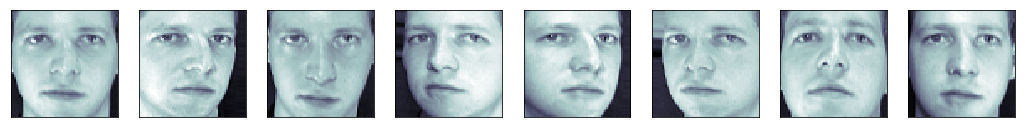

In [17]:
fig = plt.figure(figsize=(18, 6))
# plot several images
for i in range(8):
    ax = fig.add_subplot(1, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [18]:
faces.images[0].shape

(64, 64)

In [37]:
n_components = [1,2,3,5,10,25,50,100,150, 200,300, 1000,4096]

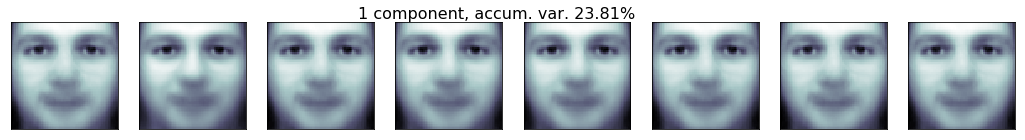

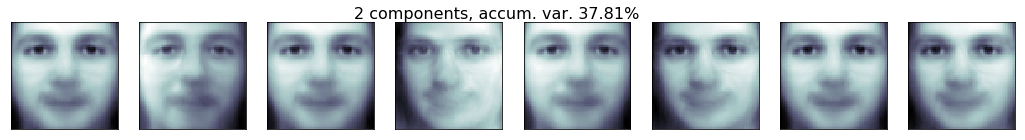

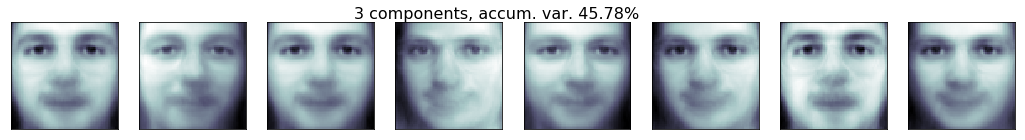

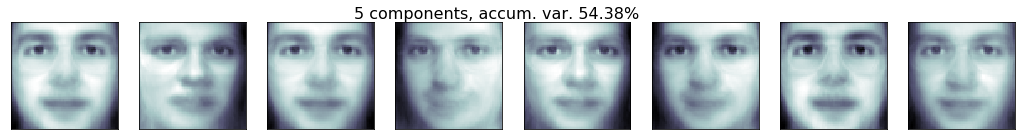

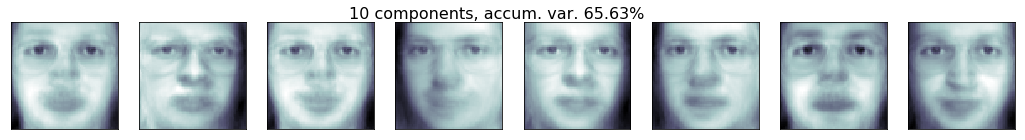

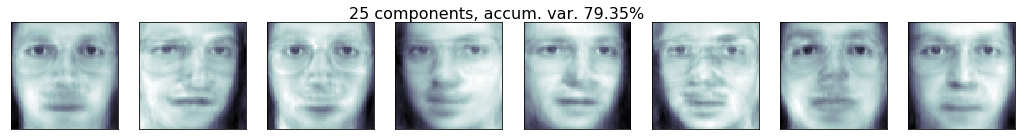

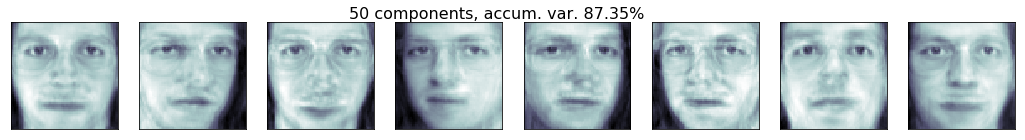

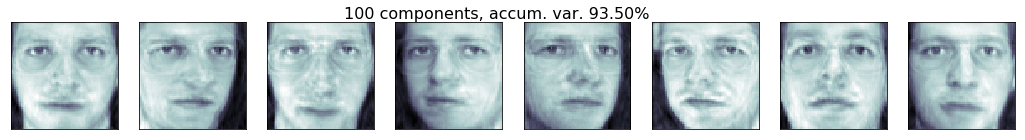

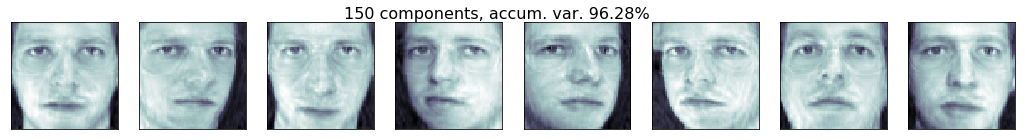

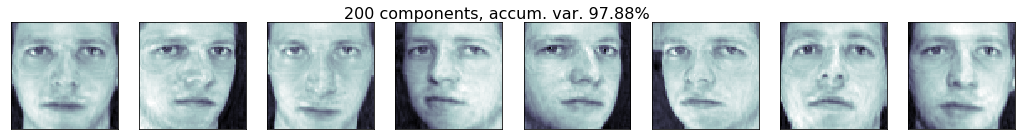

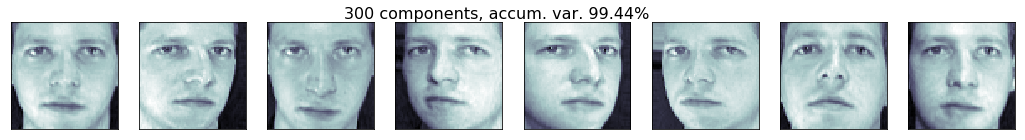

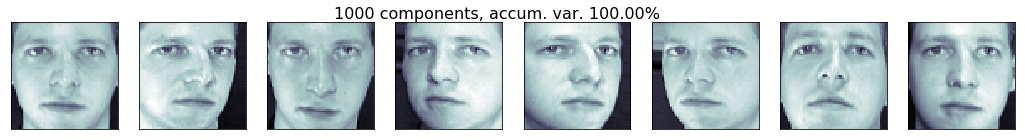

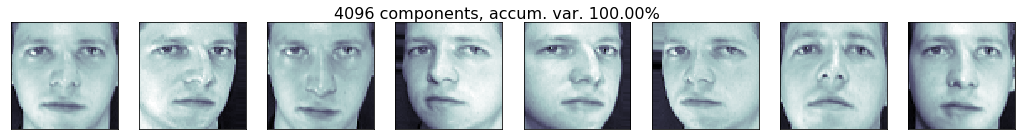

In [38]:
for n_comp in n_components:
    pca = PCA(n_components=n_comp, whiten=True)
    pca.fit(faces.data)
    fig2 = plt.figure(figsize=(18, 2))
    for i in range(8):
        ax = fig2.add_subplot(1, 8, i + 1, xticks=[], yticks=[])
        x_pca = pca.transform(faces.data[i].reshape(1, -1))
        pca_image = pca.inverse_transform(x_pca).reshape(faces.images[0].shape)
        #print(image.shape)
        ax.imshow(pca_image,  cmap=plt.cm.bone)
    #print(n_comp,pca.explained_variance_ratio_.sum())
    if n_comp == 1:
        title = "1 component, accum. var. {1:.2f}%".format(n_comp,pca.explained_variance_ratio_.sum()*100)
    else:
        title = "{0} components, accum. var. {1:.2f}%".format(n_comp,pca.explained_variance_ratio_.sum()*100)
    fig2.suptitle(title, fontsize=16)

# Kernel PCA


## KPCA Motivation

![alt text](KPCA_motivation.png "KPCA")


### Also for separation...
![alt text](Kernel_sep_higher.png "KPCA for separation")

(left) The data in ${\mathbb R}^2$ is not linearly separable


(right) The data in the feature space in $\mathbb{R}^3$ is linearly separable


<div class="alert-danger">
    
## KPCA General Idea    

* Suppose that instead of using the points $\bfx$ as is, we wanted to go to
some different feature space $\phi(\bfx) \in \mathbb{R}^Q$

* In the higher dimensional space, we can then do PCA

* The result will be non-linear in the original data space!

* $\color{blue}{Kernel substitution}$ generalize algorithms by replacing scalar products with a kernel $K$ (symmetric, i.e. 
$K(\bfx,\bfx')=K(\bfx',\bfx)$ and gives a positive semi-definite matrix ${\mathbf K}$, i.e. ${\mathbf c}^T K {\mathbf c} \geq 0$ for all ${\mathbf c} \in \mathbb{R}^Q$)

	 * Gaussian: $K(\bfx,\bfx')=\exp (-{\|\bfx-\bfx'\|}^2/ 2\sigma^2)$
	 * Polynomial: $K(\bfx,\bfx')={(\bfx^T\bfx'+c)}^2$, with $c>0$

</div>


### PCA in Feature Space

* Suppose for now that the mean of the data in feature space is 0 

* The covariance matrix
	$$
	C=\frac{1}{N}\sum_{i=1}^N \phi(\bfx_i){\phi(\bfx_i)}^T
	$$
	
	* The eigenvectors are 
	$$
	C \bfv_j=\lambda_j \bfv_j, \quad j=1, \ldots, Q
	$$
	
<div class="alert-danger">
 We want to avoid explicitly going to feature space. Instead we want to work with $\underline{kernels}$:
$$K(\bfx_i,\bfx_k)= {\phi(\bfx_i)}^T \phi(\bfx_k)$$
	
	
</div>    

* Rewrite the PCA equation:
$$
\frac{1}{N}\sum_{i=1}^N \phi(\bfx_i) {\phi(\bfx_i)}^T \bfv_j=\lambda_j \bfv_j, \quad j=1, \ldots, Q
$$
	
* So the eigenvectors can be written as a linear combination for features:
$$
\bfv_j=\sum_{i=1}^N {\color{red}{a_{ji}}}\phi(\bfx_i)
$$

* Finding the eigenvectors is equivalent to finding the coefficients $a_{ji}, \quad j=1, \ldots, Q; \, i=i, \ldots, N$


* Substituting back into the "PCA equation"
$$
\frac{1}{N}\sum_{i=1}^N \phi(\bfx_i){\phi(\bfx_i)}^T	\color{red}{\left(\sum_{l=1}^N  a_{jl}\phi(\bfx_l)  \right)}=\lambda_j \color{red}{\left(\sum_{l=1}^N a_{jl}\phi(\bfx_l) \right)}
$$

* Rearranging to get $K$ into the expression:

$$
\frac{1}{N}\sum_{i=1}^N \phi(\bfx_i) \left(\sum_{l=1}^N  a_{jl} K(\bfx_i,\bfx_l)  \right)=\lambda_j \sum_{l=1}^N a_{jl}\phi(\bfx_l) 
$$

* A small trick: Multiply both sides by $\color{blue}{\phi(\bfx_k)^T}:$

$$
\frac{1}{N}\sum_{i=1}^N \color{blue}{{\phi(\bfx_k)}^T} \phi(\bfx_i) \left(\sum_{l=1}^N  a_{jl} K(\bfx_i,\bfx_l)  \right)=\lambda_j \sum_{l=1}^N a_{jl} \color{blue}{{\phi(\bfx_k)}^T} \phi(\bfx_l) 
$$

Equivalently,
$$
\frac{1}{N}\sum_{i=1}^N K(\bfx_k,\bfx_i) \left(\sum_{l=1}^N  a_{jl} K(\bfx_i,\bfx_l)  \right)=
\lambda_j \sum_{l=1}^N a_{jl} K(\bfx_k,\bfx_l) 
$$
for all $j,k$

So, 

$$
{\bf K}^2 {\mathbf a_j }= N \lambda_j {\bf K} {\mathbf a}_j \implies {\bf K}{\color{blue} {\mathbf a}_j} = N \lambda_j {\color{blue} {\mathbf a}_j}
$$





<div class="alert-warning">

For a new point $\bfx$, its projection on the principal component is
 
$$ 
y_j={\phi(\bfx)}^T \bfv_j = \sum_{i=1}^N a_{ji} K(\bfx,\bfx_i)
$$

$j=1, \ldots, Q$

</div>

## Summary of Kernel PCA

<div class="alert-danger">
    
1. Pick a kernel

2. Construct the matrix ${\mathbf K}$

<div class="alert-success">
3. Find the eigenvectors ${\mathbf a_j}$ of ${\mathbf K}$
</div> 

4. For any data point $\bf x$, we can represent it with the follwing components in the new feature space
$$
y_j=\sum_{i=1}^N a_{ji} K(\bfx,\bfx_i)
$$
$j=1, \ldots, Q$
   


<div class="alert-success">
5. We can limit the number of components to $k < Q$ for a more
compact representation (by picking the ${\mathbf a}$'s corresponding to the highest
eigenvalues)	
</div>
    
</div>    






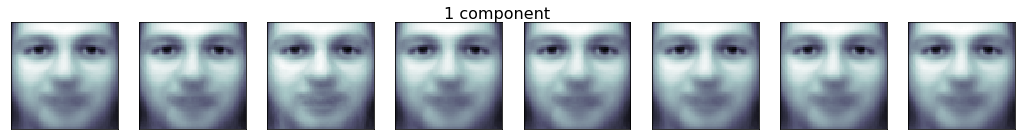

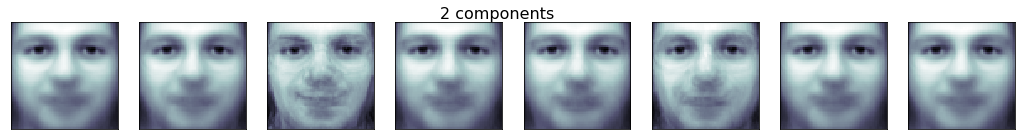

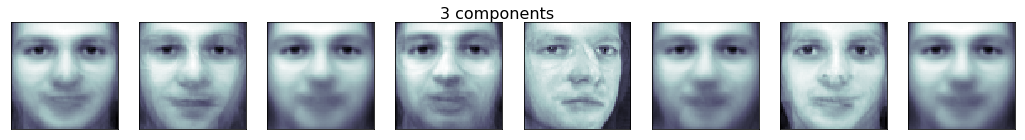

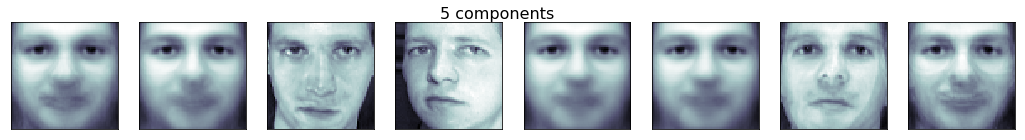

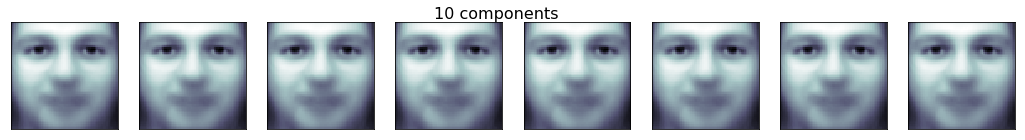

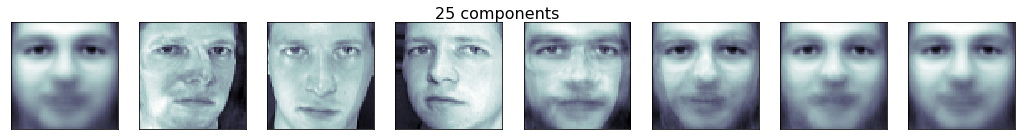

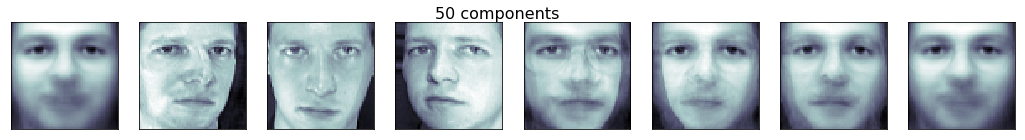

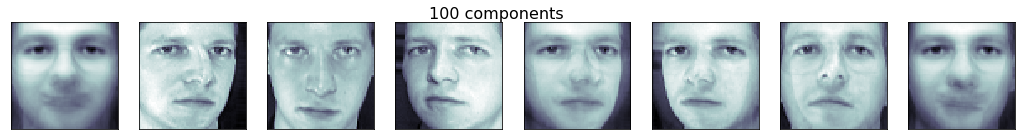

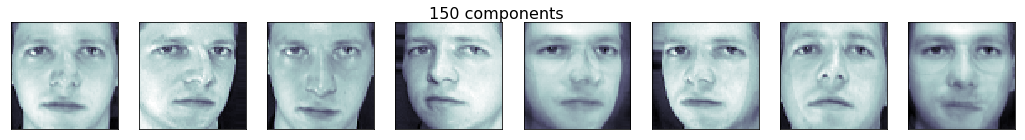

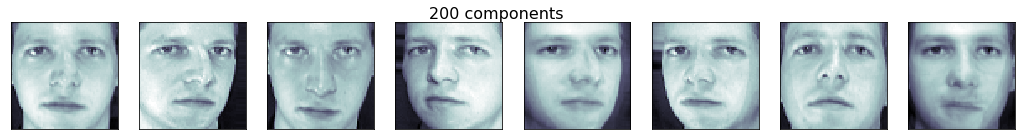

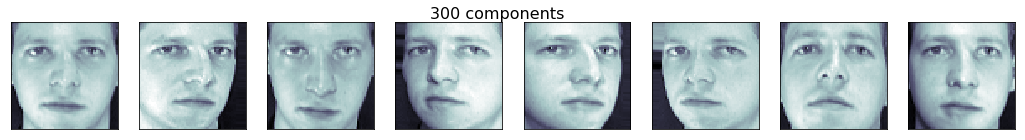

In [34]:
##Example: Eigenfaces

n_components = [1,2,3,5,10,25,50,100, 150, 200, 300]

for n_comp in n_components:
    kpca = KernelPCA(kernel="rbf", gamma=15, n_components=n_comp,fit_inverse_transform = True)
    kpca.fit(faces.data)
    fig2 = plt.figure(figsize=(18, 2))
    for i in range(8):
        ax = fig2.add_subplot(1, 8, i + 1, xticks=[], yticks=[])
        x_kpca = kpca.transform(faces.data[i].reshape(1, -1))
        kpca_image = kpca.inverse_transform(x_kpca).reshape(faces.images[0].shape)
        #print(image.shape)
        ax.imshow(kpca_image,  cmap=plt.cm.bone)
    #print(n_comp,pca.explained_variance_ratio_.sum())
    if n_comp == 1:
        title = "1 component".format(n_comp)#,kpca.explained_variance_ratio_.sum()*100)
    else:
        title = "{0} components".format(n_comp)#,kpca.explained_variance_ratio_.sum()*100)
    fig2.suptitle(title, fontsize=16)



In [43]:
## Example 

# Load libraries
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np


In [44]:
# Create linearly inseparable data
X, y = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

In [45]:
# Apply kernel PCA with radius basis function (RBF) kernel
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

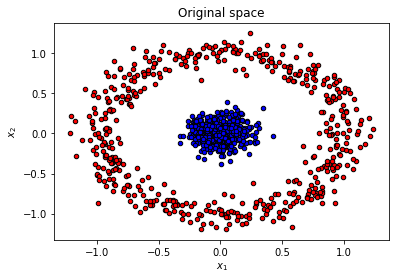

In [46]:
plt.figure()
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [47]:
# Apply kernel PCA with radius basis function (RBF) kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=2)
X_kpca = kpca.fit_transform(X)

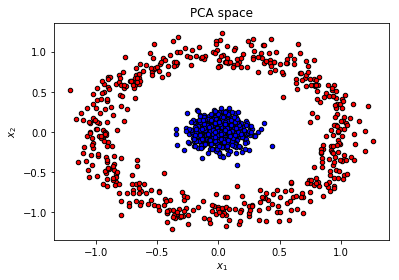

In [48]:
plt.figure()
plt.title("PCA space")
reds = y == 0
blues = y == 1

plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [49]:
# Apply kernel PCA with radius basis function (RBF) kernel
pca = PCA(n_components=1)
X_pca_1D = pca.fit_transform(X)

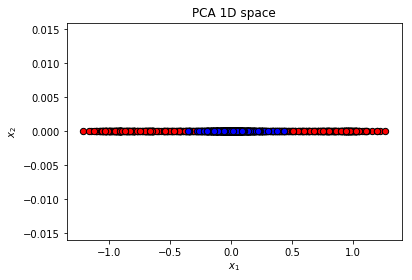

In [50]:
plt.figure()
plt.title("PCA 1D space")
reds = y == 0
blues = y == 1

plt.scatter(X_pca_1D[reds, 0], np.zeros((500,1))+0.0, c="red",
            s=40, edgecolor='k')
plt.scatter(X_pca_1D[blues, 0], np.zeros((500,1))-0.0, c="blue",
            s=40, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

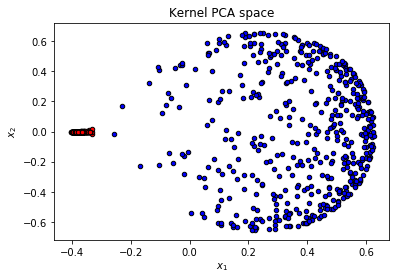

In [51]:
plt.figure()
plt.title("Kernel PCA space")
reds = y == 0
blues = y == 1

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [52]:
# Apply kernel PCA with radius basis function (RBF) kernel
kpca_1D = KernelPCA(kernel="rbf", gamma=15, n_components=1)
X_kpca_1D = kpca.fit_transform(X)

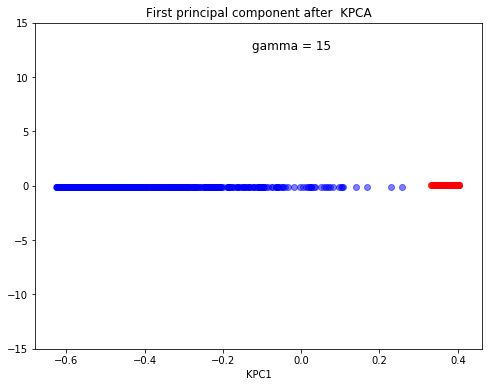

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca_1D[reds, 0], np.zeros((500,1))+0.1, color='red', alpha=0.5)
plt.scatter(X_kpca_1D[blues, 0], np.zeros((500,1))-0.1, color='blue', alpha=0.5)
plt.ylim([-15,15])
plt.text(-0.125, 12.5, 'gamma = 15', fontsize=12)
plt.title('First principal component after  KPCA')
plt.xlabel('KPC1')
plt.show()

### References:

1. Prof. Calotta Domeniconi Machine Learning class notes. George Manson University
2. Sebastian Rashka. Python Machine Learning (2nd ed)
3. Pattern Recongnition and Machine Leaning by Christopher Bishop
    
